# Part IV: Eigenfaces

In [60]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import os

### Helper Functions

In [61]:
def show(image, title ="", size = 15):
    width, height = image.shape[0], image.shape[1]
    aspect_ratio = width/height
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title)
    plt.show()

In [62]:
def load_faces():
    faces = []
    labels = []
    for i in range(1,41):
        images = os.listdir('./att_faces/s'+str(i))
        for image in images:
            img = cv.imread('./att_faces/s'+str(i)+"/"+image,0)
            faces.append(img)
            labels.append(i)
    return faces, Y


In [63]:
def preprocessing(img):
    if len(img.shape) > 2:
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.resize(img, (92,92))
    return img


 ### 1 - Preprocess the images in the chosen dataset by resizing them to a uniform dimension (e.g., 100×100 pixels) and converting them to grayscale. 

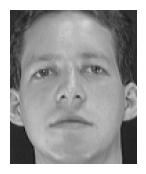

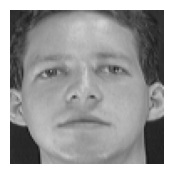

In [64]:
faces, labels = load_faces()

show(faces[0], size=2)

cv.imwrite("faces.jpg", faces[0])

assert len(faces) > 0 , "No faces loaded"

faces = list(map(preprocessing, faces))

show(faces[0], size=2)

 ### Then, flatten each image into a 1D vector.

In [65]:
faces_data = np.array([f.flatten() for f in faces])
labels = np.array(labels)

### 2 -	Implement the PCA (Principal Component Analysis) algorithm to compute the eigenvalues and eigenvectors. 

In [66]:
# Finding mean
mean = np.mean(faces_data, axis=0)
print(mean.shape)

### Finding difference
differences = faces_data - mean
print(differences.shape)

(8464,)
(400, 8464)


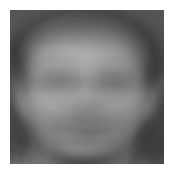

In [67]:
image = mean.reshape((92, 92))
image_uint8 = image.astype(np.uint8)
show(image_uint8, size=2)

In [68]:
### Finding covariance matrix
cov_matrix = np.cov(differences, rowvar=False)
print(cov_matrix.shape)

(8464, 8464)


In [69]:
### Finding eigenvalues and eigenvectors
eigenvalues, eigenvectors = LA.eigh(cov_matrix)

In [70]:
print(eigenvalues.shape)
print(eigenvectors.shape)

(8464,)
(8464, 8464)


### 3 -	Extract the top K principal components (eigenfaces), which capture the most variance in the dataset. Then visualize the top 10 and top 25 eigenfaces. To better visualize eigenfaces, apply a color map: [OpenCV: ColorMaps in OpenCV](https://docs.opencv.org/4.10.0/d3/d50/group__imgproc__colormap.html). 

In [71]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

In [82]:
def show_top_k_eigenfaces(k, sorted_eigenvectors, image_size=(92, 92)):
    top_eigenvectors = sorted_eigenvectors[:, :k]
    fig, axes = plt.subplots(k//5, 5, figsize=(15, k//5*3))
    for i in range(k):
        eigenface = top_eigenvectors[:, i].reshape(image_size)
        # Normalize the eigenface for visualization
        eigenface_normalized = cv.normalize(eigenface, None, 0, 255, cv.NORM_MINMAX)
        # Convert to uint8
        eigenface_normalized = eigenface_normalized.astype(np.uint8)
        # Apply a colormap
        eigenface_colormap = cv.applyColorMap(eigenface_normalized, cv.COLORMAP_JET)
        # Plot the eigenface
        ax = axes[i // 5, i % 5]
        ax.imshow(eigenface_colormap)
        ax.axis('off')
        ax.set_title(f'Eigenface {i+1}')
    plt.suptitle(f'Top {k} Eigenfaces', fontsize=16)
    plt.tight_layout()
    plt.show()


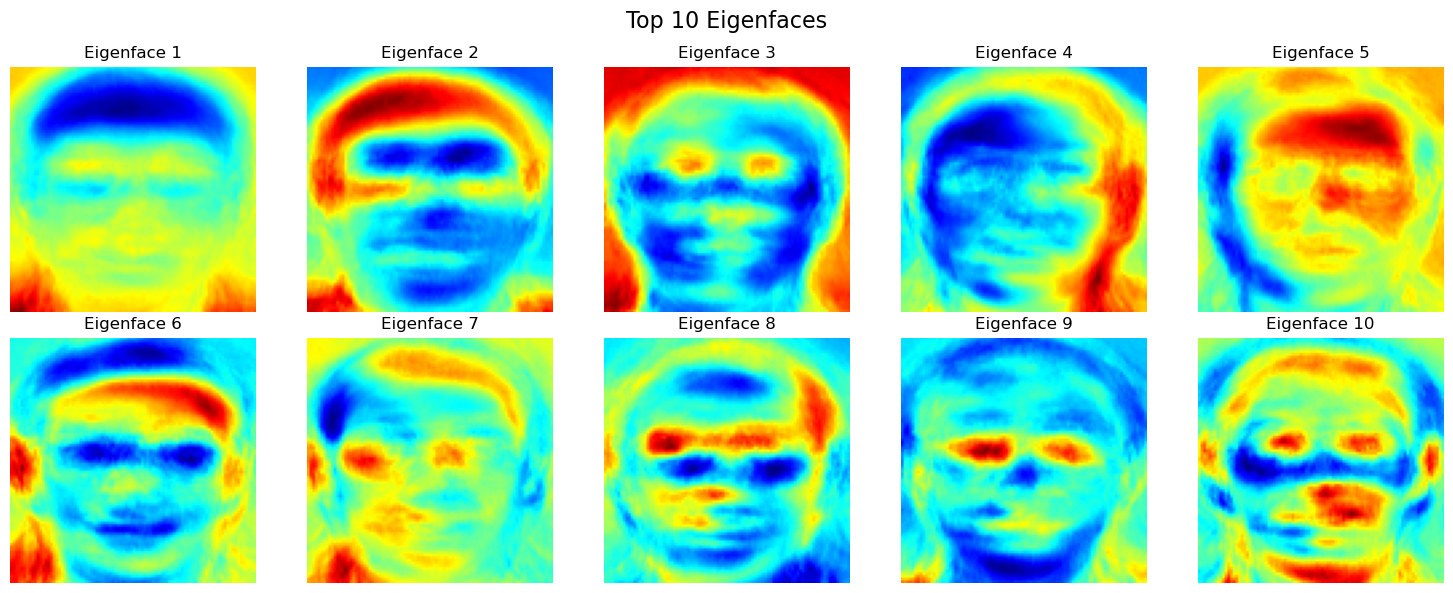

In [83]:
show_top_k_eigenfaces(10, sorted_eigenvectors)

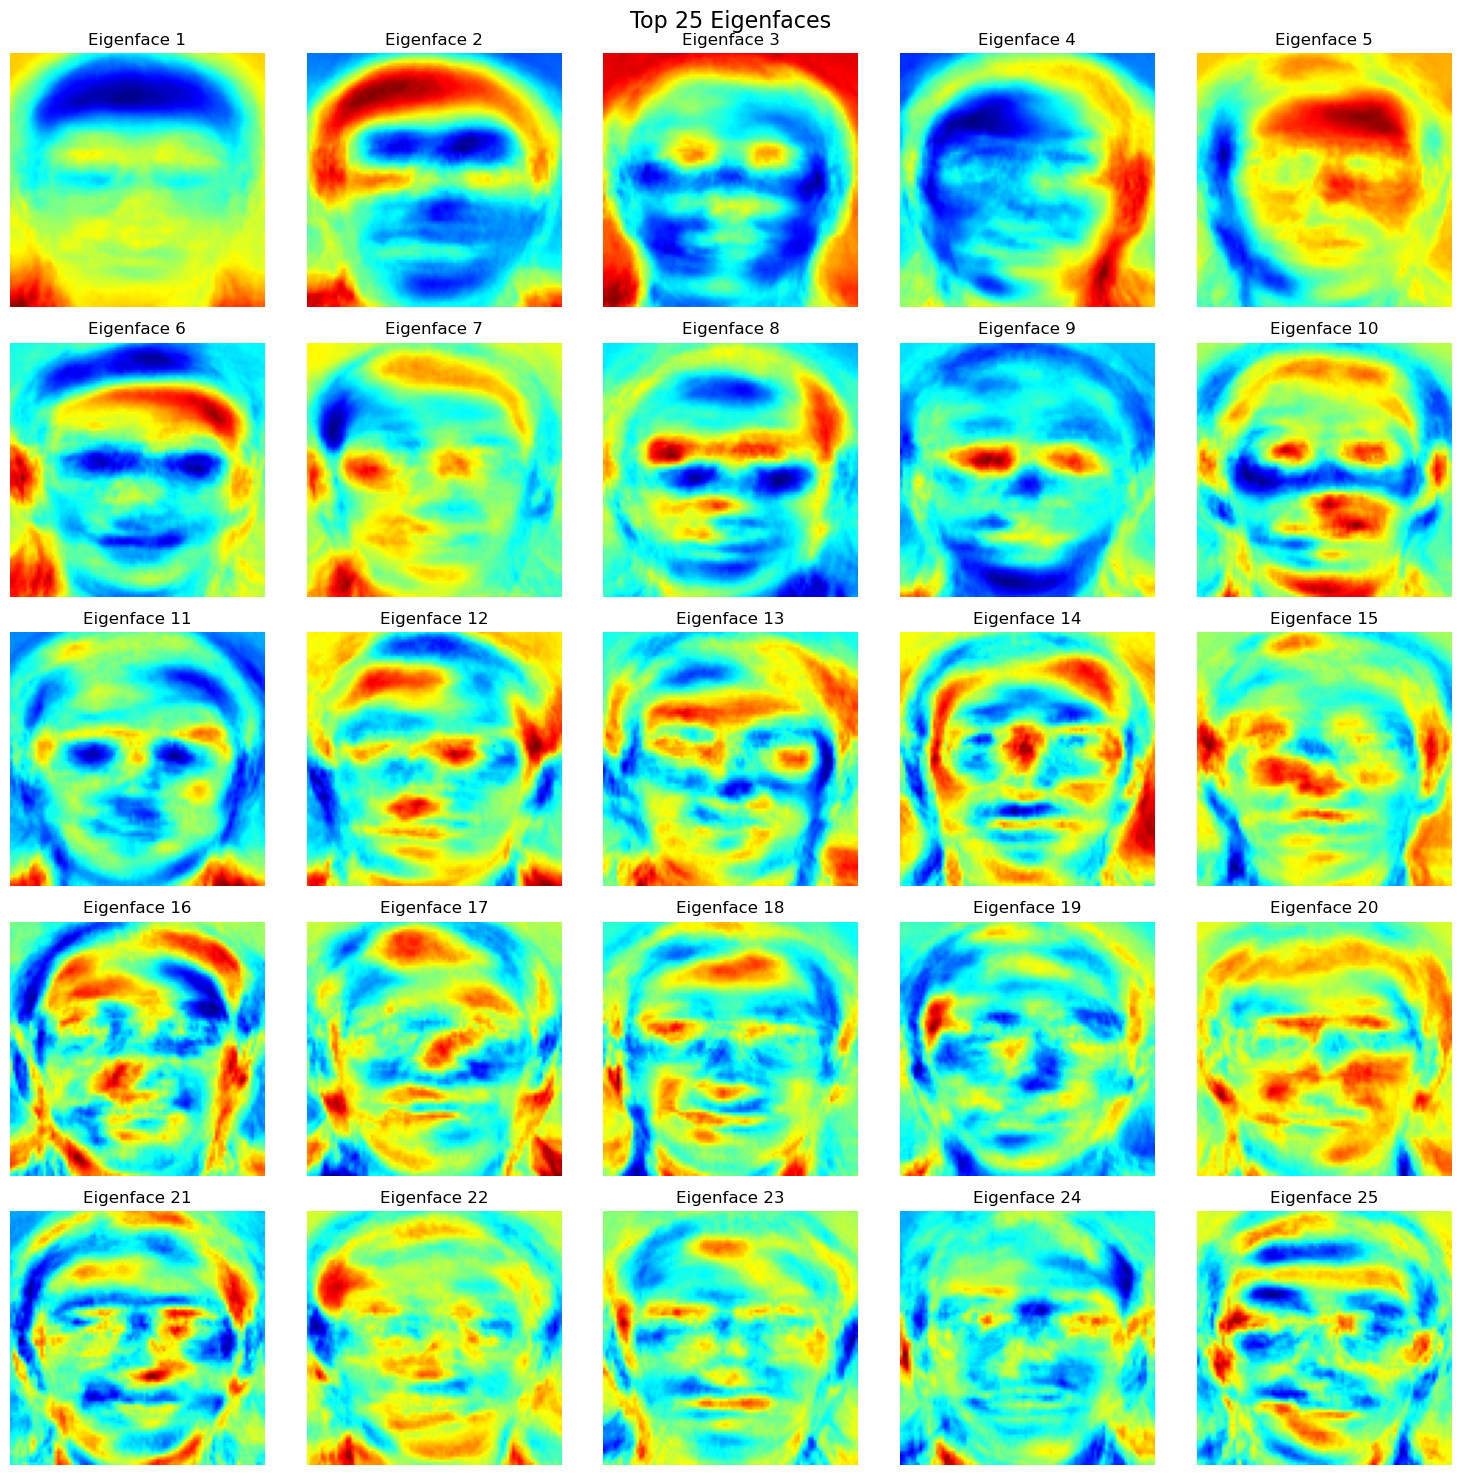

In [84]:
show_top_k_eigenfaces(25, sorted_eigenvectors)

### 4-	Reconstruct an example face image using different values of K (the number of eigenfaces). Use numpy.arange(25, 300, 25, dtype=int) for the number of eigenfaces. Display the original image alongside the reconstructed images for comparison. Paste the results here. 

In [86]:
K_values = np.arange(25, 300, 25, dtype=int)

In [92]:
print(differences.shape)

(400, 8464)


11
(8464,)


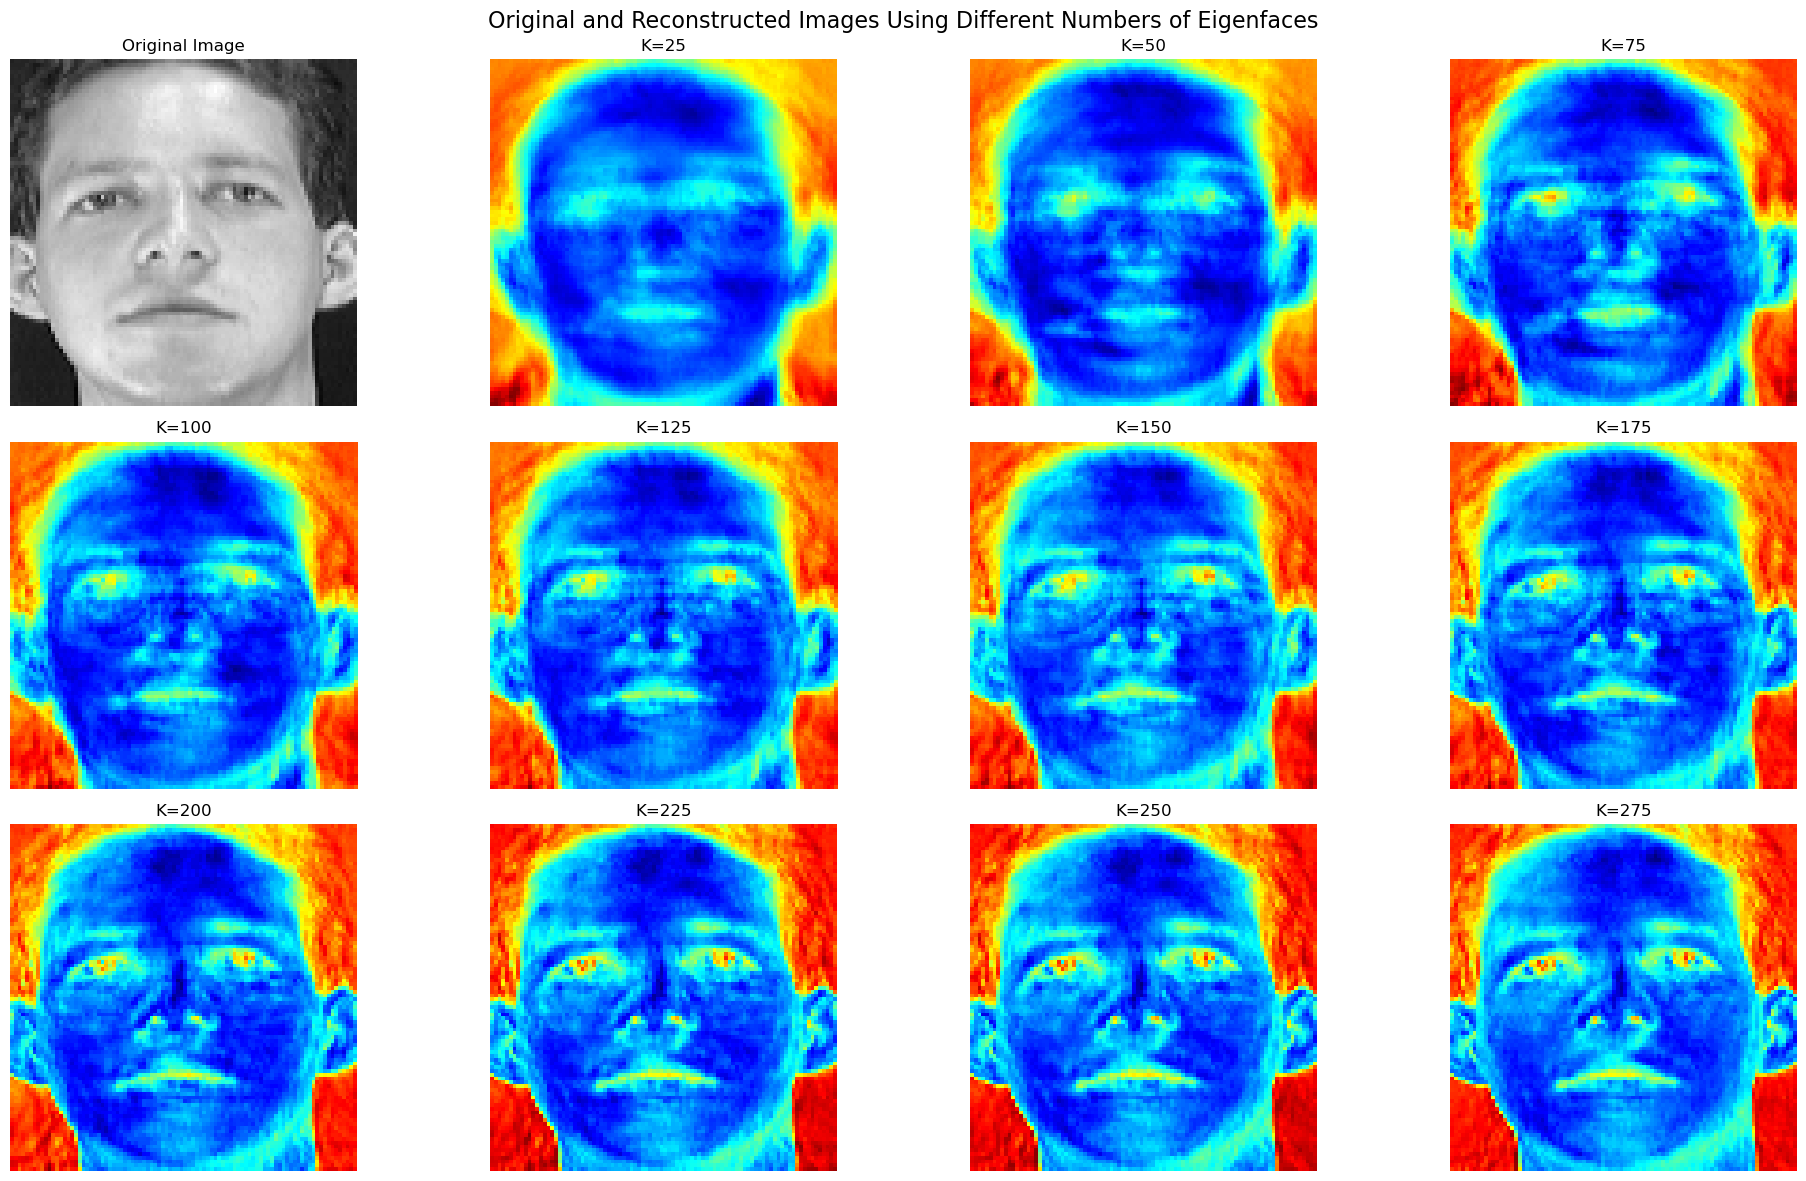

In [99]:
reconstructed_faces = []
idx = 0
example_face = faces[idx]
example_variance = differences[idx]

for K in K_values:
    # Extract the top K eigenvectors (principal components)
    top_k_eigenvectors = sorted_eigenvectors[:, :K]
    # Project the centered image onto the top K eigenvectors
    projection = np.dot(example_variance, top_k_eigenvectors)
    # Reconstruct the image from the projection
    reconstruction = mean + np.dot(projection, top_k_eigenvectors.T)
    # Append the reconstructed image to the list
    reconstructed_faces.append(reconstruction)

print(len(reconstructed_faces))
print(reconstructed_faces[0].shape)

# Visualize the original and reconstructed images
num_reconstructions = len(K_values)
fig, axes = plt.subplots(3 , (num_reconstructions + 1) // 3, figsize=(20, 12))
axes = axes.flatten()
# Display the original image
original_image = faces_data[0].reshape((92, 92))
axes[0].imshow(original_image, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original Image')

# Display reconstructed images
for i, reconstruction in enumerate(reconstructed_faces):
    reconstructed_image = reconstruction.reshape([92, 92])
    # Normalize the image for visualization
    reconstructed_image_normalized = cv.normalize(reconstructed_image, None, 0, 255, cv.NORM_MINMAX)
    reconstructed_image_normalized = reconstructed_image_normalized.astype(np.uint8)
    # Apply a colormap (optional)
    reconstructed_image_colormap = cv.applyColorMap(reconstructed_image_normalized, cv.COLORMAP_JET)
    # Plot the reconstructed image
    axes[i + 1].imshow(reconstructed_image_colormap)
    axes[i + 1].axis('off')
    axes[i + 1].set_title(f'K={K_values[i]}')

plt.suptitle('Original and Reconstructed Images Using Different Numbers of Eigenfaces', fontsize=16)
plt.tight_layout()
plt.show()